findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


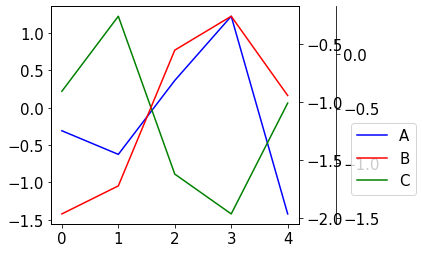

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
plt.rc("font", family="SimHei",size="15")  #解决图中中文问题

df = DataFrame(np.random.randn(5, 3), columns=['A', 'B', 'C'])

fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)


ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

df.A.plot(ax=ax, style='b-')
# same ax as above since it's automatically added on the right
df.B.plot(ax=ax, style='r-', secondary_y=True)
df.C.plot(ax=ax3, style='g-')

# add legend --> take advantage of pandas providing us access
# to the line associated with the right part of the axis
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0], ax3.get_lines()[0]],\
           ['A','B','C'], bbox_to_anchor=(1.5, 0.5))

In [45]:
import pandas as pd
import seaborn as sns

In [46]:
filedist = pd.read_csv("./testdata/_gpfsnyu_scratch_jw6800.csv")

<AxesSubplot:label='55f6c91d-e71d-416b-982f-14f9c698e944'>

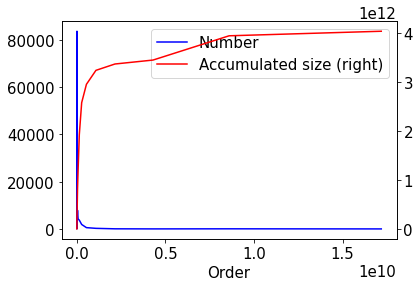

In [47]:
fig, ax = plt.subplots()
filedist.plot(x="Order",y="Number",ax=ax, style='b-')
# same ax as above since it's automatically added on the right
filedist.plot(x="Order",y="Accumulated size",ax=ax, style='r-', secondary_y=True)

,Order,Number,Accumulated size
0,0,3158,0
1,16,34,544
2,32,17,1598
3,64,290,27444
4,128,713,184838


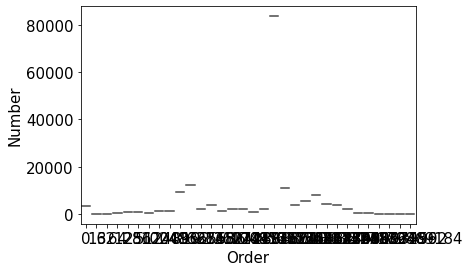

In [48]:
sns.violinplot(x="Order",y="Number",data=filedist)
filedist.head()

<AxesSubplot:xlabel='Order'>

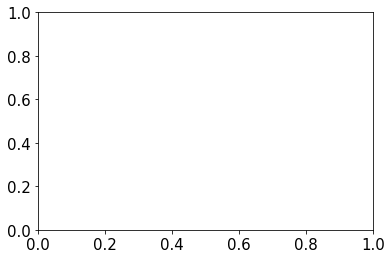

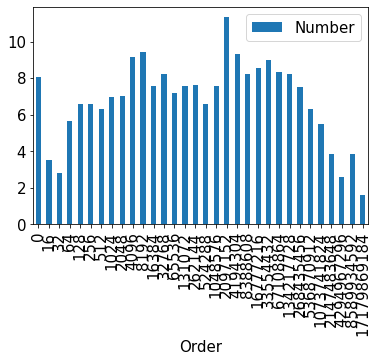

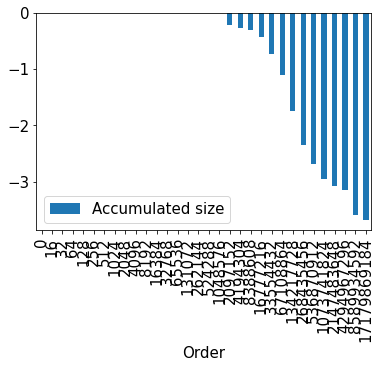

In [49]:
fd2 = filedist.copy()
fd2["Accumulated size"] = -1*fd2["Accumulated size"]/1024/1024/1024/1024
fd2["Number"] = np.log(fd2["Number"])
fig, ax = plt.subplots()
fd2.plot.bar(x="Order",y="Number")
# same ax as above since it's automatically added on the right
fd2.plot.bar(x="Order",y="Accumulated size")
# fd2.plot.bar(rot=0)

In [51]:
filedist.head()

,Order,Number,Accumulated size
0,0,3158,0
1,16,34,544
2,32,17,1598
3,64,290,27444
4,128,713,184838


In [95]:
# 尺寸分类
# sepList = [0, 64k, 1024k,8M, 64M,1024M]
sepList = [0, 64*1024, 1024*1024, 8*1024*1024, 64*1024*1024, 1024*1024*1024]
sepLabel = ["0", "64k", "1M", "8M", "64M", "1024M", "bigger"]
print(sepList)



[0, 65536, 1048576, 8388608, 67108864, 1073741824]


In [98]:

def getIndex(order, sourceList):
    listLength = len(sourceList)
    for i in range(listLength):
        if order == sourceList[i]:
            return i
        elif sourceList[i-1] < order:
            if order <= sourceList[i]:
                return i
            else:
                continue

    return listLength



#for i in range(len(sepList)):
#    print("{}:{}".format(i,getIndex(sepList[i],sepList)))

fileDD = {}
for index, row in filedist.iterrows():
    idd = getIndex(row["Order"],sepList)
    if idd in fileDD.keys():
        fileDD[idd]["Number"] += row["Number"]
        fileDD[idd]["Accumulated size"] = row["Accumulated size"]
    else:
        fileDD[idd] = {"Number":row["Number"],
                        "Accumulated size":row["Accumulated size"]}

print(fileDD)
    




{0: {'Number': 3158, 'Accumulated size': 0}, 1: {'Number': 33253, 'Accumulated size': 561363276}, 2: {'Number': 6715, 'Accumulated size': 4995610687}, 3: {'Number': 98450, 'Accumulated size': 340289521353}, 4: {'Number': 17435, 'Accumulated size': 1209115420215}, 5: {'Number': 6394, 'Accumulated size': 3245190053541}, 6: {'Number': 113, 'Accumulated size': 4045177218597}}


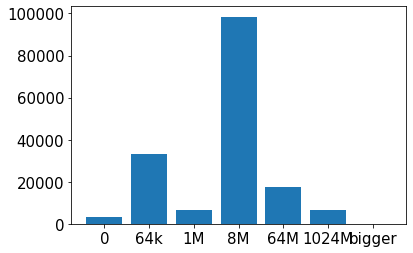

In [111]:
x = []
y = []
z = []
for key in fileDD.keys():
    x.append(sepLabel[key])
    y.append(fileDD[key]["Number"])
    z.append(fileDD[key]["Accumulated size"])
plt.bar(x,y)
plt.show()

# 写好x轴，y轴的标签，并把图片保存下来。